## Import the Dataset and Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

%matplotlib inline

In [2]:
dataset = pd.read_csv('StudentsPerformance.csv')
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Exploratory Data Analysis

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
dataset.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
dataset['Total marks'] = dataset['math score'] + dataset['reading score'] + dataset['writing score']

In [8]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


<AxesSubplot:xlabel='Total marks', ylabel='Count'>

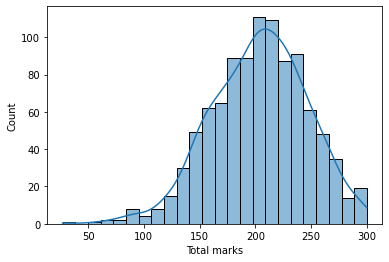

In [26]:
sns.histplot(dataset['Total marks'], kde = True)

<AxesSubplot:xlabel='gender', ylabel='Total marks'>

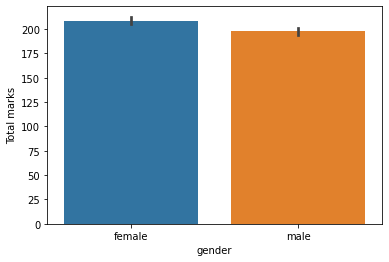

In [27]:
sns.barplot(x = dataset.gender, y = dataset['Total marks'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='Total marks'>

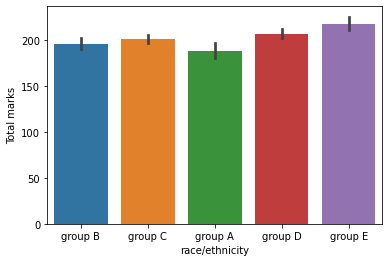

In [28]:
sns.barplot(x = dataset['race/ethnicity'], y = dataset['Total marks'])

<AxesSubplot:xlabel='parental level of education', ylabel='Total marks'>

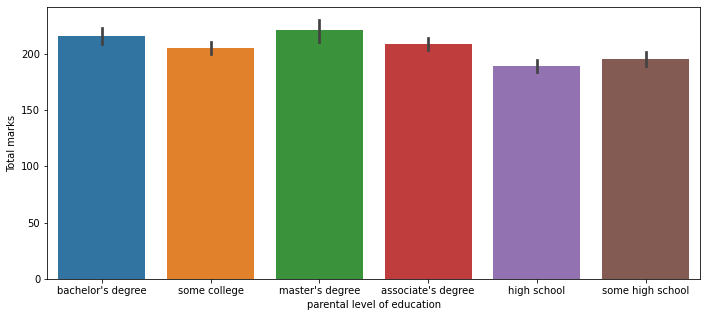

In [29]:
a4_dims = (11.7, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = dataset['parental level of education'], y = dataset['Total marks'], ax = ax) 

<AxesSubplot:xlabel='test preparation course', ylabel='Total marks'>

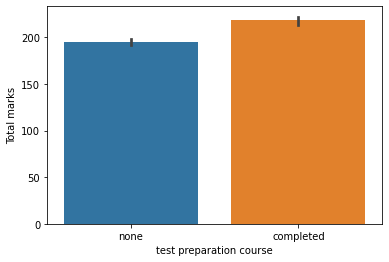

In [30]:
sns.barplot(x = dataset['test preparation course'], y = dataset['Total marks'])

## Hypothesis Testing

First Test: To check whether there exist a relationship betweem the Test Preparation and the Total Marks obtained in the test
Null Hypothesis: No relation exist between the test preparation and the total marks obtained
Alternate Hypothesis: 

In [32]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(dataset['test preparation course'], dataset['Total marks']))
print('P value for the test is: ' + str(p))

P value for the test is: 0.016344050879986458


In [34]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(dataset['parental level of education'], dataset['Total marks']))
print('P value for the test is: ' + str(p))

P value for the test is: 0.16592440242122858


In [35]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(dataset['race/ethnicity'], dataset['Total marks']))
print('P value for the test is: ' + str(p))

P value for the test is: 0.05380689759359174


In [36]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(dataset['gender'], dataset['Total marks']))
print('P value for the test is: ' + str(p))

P value for the test is: 0.3988259596259684


In [37]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(dataset['parental level of education'], dataset['race/ethnicity']))
print('P value for the test is: ' + str(p))

P value for the test is: 0.07911304840592047


In [39]:
pd.crosstab(dataset['parental level of education'], dataset['Total marks'])

Total marks,27,55,69,70,78,88,89,90,92,93,...,288,289,290,291,292,293,296,297,299,300
parental level of education,,,,,,,,,,,,,,,,,,,,,
associate's degree,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
bachelor's degree,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,0,1,2
high school,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
master's degree,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
some college,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,1,1,0,0
some high school,1,0,0,0,2,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [41]:
dataset_onehot = pd.get_dummies(dataset, columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'])

In [42]:
dataset_onehot.head()

,math score,reading score,writing score,Total marks,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,218,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,69,90,88,247,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
2,90,95,93,278,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,47,57,44,148,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,76,78,75,229,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1


In [47]:
X = dataset_onehot.iloc[: , 4:-1].values
y = dataset_onehot.iloc[: , 3].values

In [50]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
#Fitting Multiple Linear Regression to the training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [53]:
#predicting the test set results
y_pred = regressor.predict(X_test)

In [54]:
from sklearn import metrics

In [55]:
metrics.mean_absolute_error(y_test, y_pred)

31.34

In [56]:
metrics.mean_squared_error(y_test, y_pred)

1502.9325

In [57]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

38.767673389049286

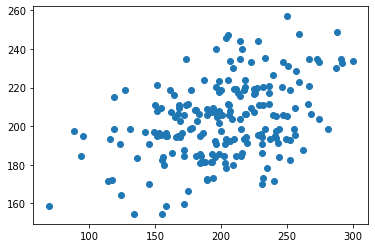

In [59]:
plt.scatter(y_test, y_pred)

<AxesSubplot:ylabel='Count'>

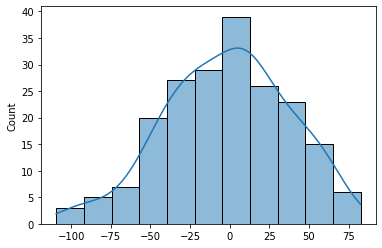

In [61]:
sns.histplot((y_test - y_pred), alpha = 0.5, kde = True)

In [64]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

normaltest(dataset['Total marks'].values)

NormaltestResult(statistic=15.18672132723161, pvalue=0.0005037851534493755)

In [65]:
from scipy.stats import boxcox

In [66]:
bc_result = boxcox(dataset['Total marks'])
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [68]:
normaltest(boxcox_medv)

NormaltestResult(statistic=2.7798577887622127, pvalue=0.24909301591503355)

In [70]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

-2.7814607510524656

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, boxcox_medv, test_size = 0.2, random_state = 0)

In [73]:
#Fitting Multiple Linear Regression to the training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [74]:
#predicting the test set results
y_pred = regressor.predict(X_test)

In [79]:
r2_score(y_test, y_pred)

0.17492080102952534

In [76]:
metrics.mean_absolute_error(y_test, y_pred)

271.9716629506024

In [77]:
metrics.mean_squared_error(y_test, y_pred)

110740.95723258809

In [78]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

332.7776393217971